# Analisando a taxa de retorno simples e logaritmica das ações

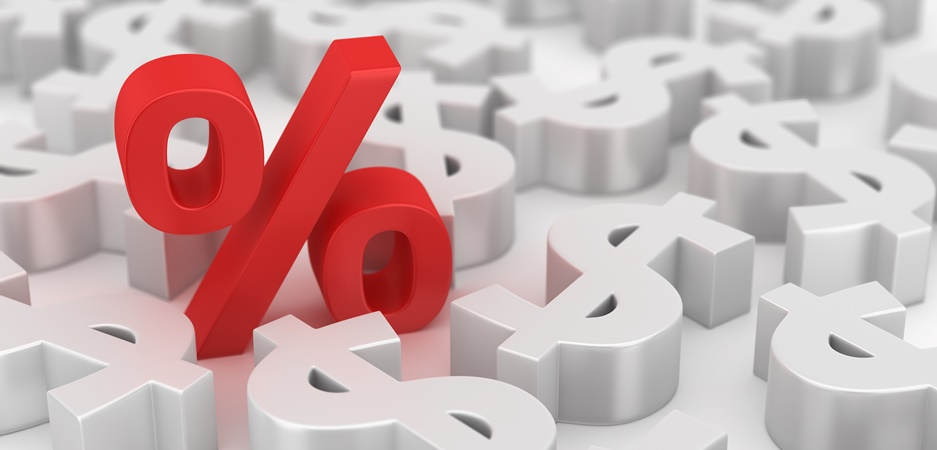

#### Importando as biblicotecas que usaremos nessa analise

In [54]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Aqui, vamos apontar as ações que queremos analisar
#### No nosso caso vamos pegar os dados da PETROBRAS e VALE desde o ano de 1995

In [21]:
Petrobras = wb.DataReader('PETR4.SA', data_source='yahoo', start='1995-1-1')
Vale = wb.DataReader('VALE3.SA', data_source='yahoo', start='1995-1-1')

### Vamos iniciar com a Petrobras
#### Vamos conferir se esta tudo certo com os dados

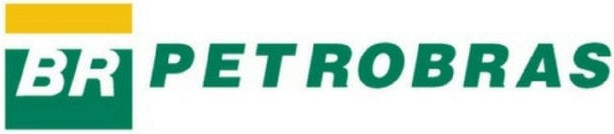

In [22]:
Petrobras.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5341 entries, 2000-01-03 to 2021-04-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5341 non-null   float64
 1   Low        5341 non-null   float64
 2   Open       5341 non-null   float64
 3   Close      5341 non-null   float64
 4   Volume     5341 non-null   float64
 5   Adj Close  5341 non-null   float64
dtypes: float64(6)
memory usage: 292.1 KB


In [17]:
Petrobras.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,3.538944e+10,3.941121
2000-01-04,5.550,5.550,5.550,5.550,2.886144e+10,3.723102
2000-01-05,5.494,5.494,5.494,5.494,4.303360e+10,3.685536
2000-01-06,5.475,5.475,5.475,5.475,3.405568e+10,3.672790
2000-01-07,5.500,5.500,5.500,5.500,2.091264e+10,3.689559


In [6]:
Petrobras.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-31,24.230000,23.780001,23.799999,24.100000,68609400.0,24.100000
2021-04-01,24.389999,23.780001,24.290001,23.889999,47232900.0,23.889999
2021-04-05,24.200001,23.680000,24.129999,23.980000,38337600.0,23.980000
2021-04-06,24.370001,23.910000,24.180000,24.020000,45934300.0,24.020000
2021-04-07,24.340000,23.930000,23.940001,24.000000,55068500.0,24.000000


### Agora vamos adcionar uma coluna com o calculo da taxa de retorno diaria, chamaremos essa coluna de "Simple Return"

In [25]:
Petrobras['Simple Return'] = (Petrobras['Adj Close'] / Petrobras['Adj Close'].shift(1)) - 1

In [26]:
Petrobras

,High,Low,Open,Close,Volume,Adj Close,Simple Return
Date,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,3.538944e+10,3.941121,NaN
2000-01-04,5.550000,5.550000,5.550000,5.550000,2.886144e+10,3.723102,-0.055319
2000-01-05,5.494000,5.494000,5.494000,5.494000,4.303360e+10,3.685536,-0.010090
2000-01-06,5.475000,5.475000,5.475000,5.475000,3.405568e+10,3.672790,-0.003458
2000-01-07,5.500000,5.500000,5.500000,5.500000,2.091264e+10,3.689559,0.004566
...,...,...,...,...,...,...,...
2021-03-31,24.230000,23.780001,23.799999,24.100000,6.860940e+07,24.100000,0.011330
2021-04-01,24.389999,23.780001,24.290001,23.889999,4.723290e+07,23.889999,-0.008714
2021-04-05,24.200001,23.680000,24.129999,24.040001,4.045440e+07,24.040001,0.006279


### A seguir vamos plotar os dados de maneira que nos seja possivel fazer uma observação historica dos retornos diarios.
##### Note que nessa analise muitas das vezes os movimentos de queda serão mais significativos do que os de alta, isso porque uma noticia, um problema administrativo ou muitos outros fatoros podem levar os preços a cairem muito rapidamente, contudo, anime-se!!! Os retornos positivos ainda que tenham uma vida mais árdua se acumulam ao longo do tempo e os preços das ações SOBEM...

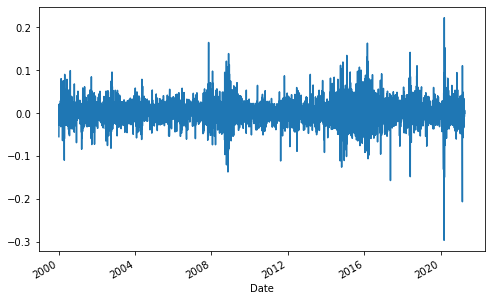

In [27]:
Petrobras['Simple Return'].plot(figsize=(8,5))

### Aqui, vamos calcular o retorno medio diario da Petrobras, depois vamos multiplicar por '250' para chegarmos ao retorno medio anual
#### Note que a Bolsa de Valores não funciona 365 dias por ano, levando em consideração finais de semana e feriados temos em media 250 dias de funcionamento da Bolsa de Valores

In [30]:
media_diaria_retorno_PETR4 = Petrobras['Simple Return'].mean()
media_diaria_retorno_PETR4

0.000708546517242419

In [32]:
media_anual_retorno_PETR4 = Petrobras['Simple Return'].mean()*250
media_anual_retorno_PETR4

0.17713662931060475

#### Vamos converter esse numero e concatenarmos com o sinal de "%" para que voce possa enxergar de forma mais amigável

In [33]:
print (str(round(media_anual_retorno_PETR4, 5)*100) + '%')

17.714%


### UAU, esse é um belo retorno, não?
## ---------------------------------------------------------------------------------------------------------------------------------

 # Retorno Logaritmico
 ### Vamos fazer o mesmo processo mas dessa vez usando a escala Logaritmica, essa escala não é tão comum fora do mercado financeiro, no entanto voce precisa saber que essa é a escala mais indicada para analise individual de papeis por um longo periodo, a escala padrão que usamos anteriormente é a mais indicada para analisar uma carteira de investimentos.
 
 ### Vamos criar uma coluna para os retornos Logaritmicos, chamaremos essa coluna de "Log Return"

In [35]:
Petrobras['Log Return'] = np.log(Petrobras['Adj Close'] / Petrobras['Adj Close'].shift(1))

#### Vamos conferir os dados e se a coluna foi criada com sucesso

In [36]:
Petrobras.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5341 entries, 2000-01-03 to 2021-04-07
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   High           5341 non-null   float64
 1   Low            5341 non-null   float64
 2   Open           5341 non-null   float64
 3   Close          5341 non-null   float64
 4   Volume         5341 non-null   float64
 5   Adj Close      5341 non-null   float64
 6   Simple Return  5340 non-null   float64
 7   Log Return     5340 non-null   float64
dtypes: float64(8)
memory usage: 375.5 KB


In [37]:
Petrobras.head()

,High,Low,Open,Close,Volume,Adj Close,Simple Return,Log Return
Date,,,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,3.538944e+10,3.941121,NaN,NaN
2000-01-04,5.550,5.550,5.550,5.550,2.886144e+10,3.723102,-0.055319,-0.056908
2000-01-05,5.494,5.494,5.494,5.494,4.303360e+10,3.685536,-0.010090,-0.010141
2000-01-06,5.475,5.475,5.475,5.475,3.405568e+10,3.672790,-0.003458,-0.003464
2000-01-07,5.500,5.500,5.500,5.500,2.091264e+10,3.689559,0.004566,0.004555


In [38]:
Petrobras.tail()

,High,Low,Open,Close,Volume,Adj Close,Simple Return,Log Return
Date,,,,,,,,
2021-03-31,24.230000,23.780001,23.799999,24.100000,68609400.0,24.100000,0.011330,0.011267
2021-04-01,24.389999,23.780001,24.290001,23.889999,47232900.0,23.889999,-0.008714,-0.008752
2021-04-05,24.200001,23.680000,24.129999,24.040001,40454400.0,24.040001,0.006279,0.006259
2021-04-06,24.370001,23.910000,24.180000,24.020000,45934300.0,24.020000,-0.000832,-0.000832
2021-04-07,24.340000,23.930000,23.940001,24.000000,55068500.0,24.000000,-0.000833,-0.000833


### Agora vamos calcular a media do retorno logaritmico diario e anual

In [39]:
media_diaria_log_PETR4 = Petrobras['Log Return'].mean()
media_diaria_log_PETR4

0.00033831246133342807

In [40]:
media_anual_log_PETR4 = Petrobras['Log Return'].mean()*250
media_anual_log_PETR4

0.08457811533335702

In [98]:
retorno_Petrobras = (str(round(media_anual_log_PETR4, 5)*100) + '%')
retorno_Petrobras

'8.458%'

## -Ué, cade aquele retorno lindo?
## -Pés no chão meu caro, pés no chão!
# -------------------------------------------------------------------------------------------------------------

## Agora vamos analisar a Vale, dessa vez vamos fazer apenas a analise de retorno logaritmica rapidamente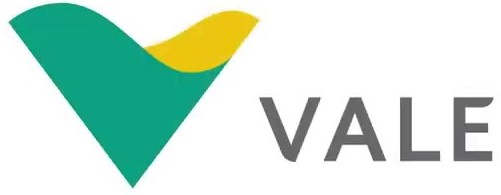

In [82]:
Vale['Log Return'] = np.log(Vale['Adj Close'] / Vale['Adj Close'].shift(1))

In [83]:
Vale.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5341 entries, 2000-01-03 to 2021-04-07
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   High        5341 non-null   float64
 1   Low         5341 non-null   float64
 2   Open        5341 non-null   float64
 3   Close       5341 non-null   float64
 4   Volume      5341 non-null   float64
 5   Adj Close   5341 non-null   float64
 6   Log Return  5340 non-null   float64
dtypes: float64(7)
memory usage: 333.8 KB


In [84]:
Vale.head()

,High,Low,Open,Close,Volume,Adj Close,Log Return
Date,,,,,,,
2000-01-03,3.542500,3.500000,3.500000,3.500000,585600.0,2.099435,NaN
2000-01-04,3.474166,3.416666,3.466666,3.416666,782400.0,2.049448,-0.024097
2000-01-05,3.416666,3.375000,3.375000,3.416666,1876800.0,2.049448,0.000000
2000-01-06,3.500000,3.416666,3.416666,3.416666,792000.0,2.049448,0.000000
2000-01-07,3.559166,3.458333,3.458333,3.541666,5347200.0,2.124428,0.035932


In [85]:
Vale.tail()

,High,Low,Open,Close,Volume,Adj Close,Log Return
Date,,,,,,,
2021-03-31,98.559998,96.699997,97.169998,97.970001,18792000.0,97.970001,0.009229
2021-04-01,98.860001,96.129997,98.500000,97.389999,17193400.0,97.389999,-0.005938
2021-04-05,103.820000,99.800003,99.830002,103.389999,35908700.0,103.389999,0.059785
2021-04-06,104.559998,102.050003,103.800003,102.050003,22227800.0,102.050003,-0.013045
2021-04-07,105.320000,102.150002,102.370003,104.760002,30388900.0,104.760002,0.026209


In [86]:
media_diaria_log_Vale = Vale['Log Return'].mean()
media_diaria_log_Vale

0.000732210458676025

In [87]:
media_anual_log_Vale = Vale['Log Return'].mean()*250
media_anual_log_Vale

0.18305261466900624

In [96]:
retorno_Vale = (str(round(media_anual_log_Vale, 5)*100) + '%')
retorno_Vale

'18.305%'

##                                          Isso sim é impressionante ein?

## Que tal compararmos as ações historicamente?

## Vamos lá!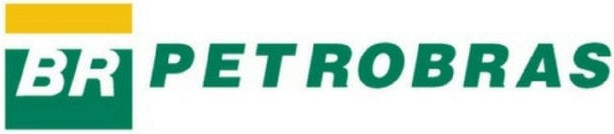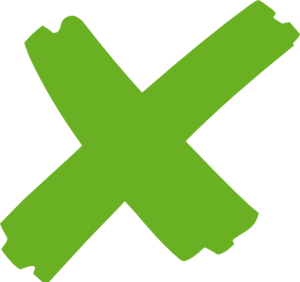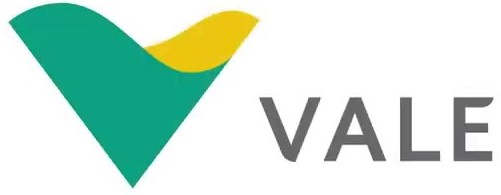

In [89]:
Papeis = ['PETR4.SA', 'VALE3.SA']

data = pd.DataFrame()
for i in Papeis:
    data[i] = wb.DataReader(i, 'yahoo', '1995-1-1')['Adj Close']

## Conferir os dados

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5342 entries, 2000-01-03 to 2021-04-08
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  5342 non-null   float64
 1   VALE3.SA  5342 non-null   float64
dtypes: float64(2)
memory usage: 125.2 KB


In [91]:
data.head()

,PETR4.SA,VALE3.SA
Date,,
2000-01-03,3.941121,2.099435
2000-01-04,3.723102,2.049448
2000-01-05,3.685536,2.049448
2000-01-06,3.672790,2.049448
2000-01-07,3.689559,2.124428


In [92]:
data.tail()

,PETR4.SA,VALE3.SA
Date,,
2021-04-01,23.889999,97.389999
2021-04-05,24.040001,103.389999
2021-04-06,24.020000,102.050003
2021-04-07,24.000000,104.760002
2021-04-08,23.969999,104.830002


### So para lembrar:

In [100]:
print('O retorno medio anual da Vale: ' + retorno_Vale)
print('O retorno medio anual da Petrobras: ' + retorno_Petrobras)

O retorno medio anual da Vale: 18.305%
O retorno medio anual da Petrobras: 8.458%


## Vamos normalizar os valores para base 100 e protar um grafico onde nos será possivel a comparação

In [94]:
normalizado = (data / data.iloc[1] * 100)

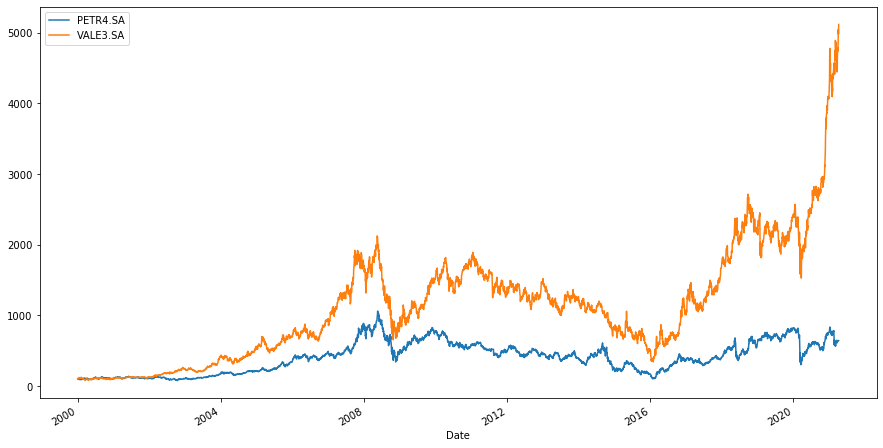

In [95]:
normalizado.plot(figsize=(15,8))

# Com analises simples nós podemos fazer muito...
### Esse notebook não tem como finalidade indicar investimento, é apenas para fins didaticos.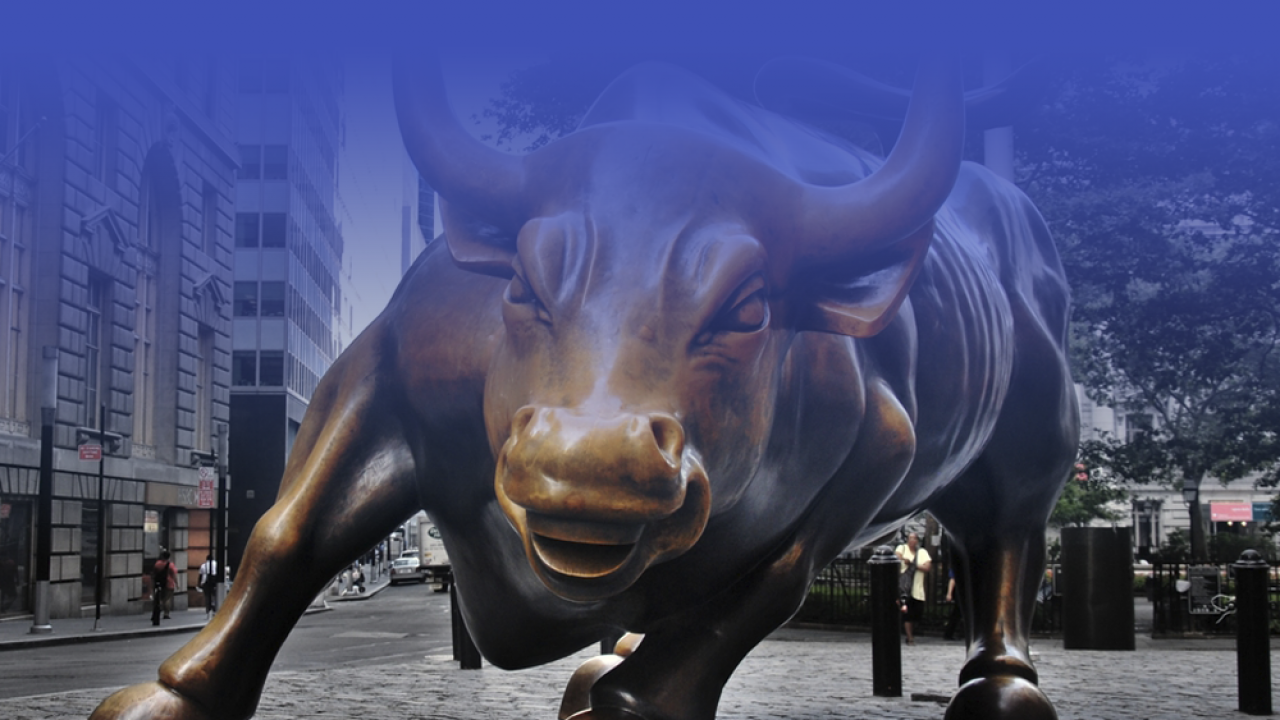